In [ ]:

!pip install geopandas;
!pip install colorcet;
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import shape, LineString, Polygon, Point
import matplotlib
from matplotlib import pyplot as plt
from bokeh.io import output_file, show,output_notebook
from bokeh.models import ColumnDataSource,ColorBar,HoverTool, BasicTicker, LinearColorMapper, PrintfTickFormatter
from bokeh.transform import linear_cmap
from bokeh.plotting import figure, output_file, show
from bokeh.models import Div
from bokeh.tile_providers import ESRI_IMAGERY, get_provider
import colorcet as cc
from bokeh.io import output_notebook, show
from bokeh.models.transforms import CustomJSTransform
from bokeh.transform import factor_cmap, factor_mark, transform
from os import name



     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 41.6 MB/s 
     |████████████████████████████████| 16.7 MB 296 kB/s 


In [ ]:
#Imports the Hurricane Data shape file(that was made in ArcMap)

hgpd = gpd.read_file('/content/drive/MyDrive/Final Project/mapps/Export_Output_3.shp')

In [ ]:
#Check the CRS and Geom_Type for the data in the file

hgpd.crs
hgpd.geom_type

In [ ]:
#Changes the crs
hurri_set_crs = hgpd.set_crs('EPSG:4326', allow_override = True)

In [ ]:
# Resetting the crs to 3857 (which is what bokeh prefers)
hurri_crs = hurri_set_crs.to_crs('EPSG:3857')
hurri_crs.head()

,ID,name,year,month,day,Slash,time,Latitude,Longitude,pressure,wind_speed,stage,geometry
0,1,Alex,2016,Jan,7.0,/,0,26.6,-75.3,1010,40,extratropical,POINT (-8382357.657 3073585.305)
1,2,Alex,2016,Jan,7.0,/,600,27.6,-74.7,1003,45,extratropical,POINT (-8315565.962 3198635.903)
2,3,Alex,2016,Jan,7.0,/,1200,28.7,-73.8,997,50,extratropical,POINT (-8215378.421 3337517.887)
3,4,Alex,2016,Jan,7.0,/,1800,30.0,-72.5,987,55,extratropical,POINT (-8070663.083 3503549.844)
4,5,Alex,2016,Jan,8.0,/,0,31.4,-70.6,986,55,extratropical,POINT (-7859156.050 3684806.442)


In [ ]:
#breaks apart the geometry coordinates into two seperate columns

def getPointCoords(row, geom, coord_type):
  if coord_type == 'x':
    return row[geom].x
  elif coord_type == 'y':
    return row[geom].y


hurri_crs['x'] = hurri_crs.apply(getPointCoords, geom = 'geometry', coord_type = 'x', axis = 1)
hurri_crs['y'] = hurri_crs.apply(getPointCoords, geom = 'geometry', coord_type = 'y', axis = 1)



In [ ]:
hurri_crs.head()

,ID,name,year,month,day,Slash,time,Latitude,Longitude,pressure,wind_speed,stage,geometry,x,y
0,1,Alex,2016,Jan,7.0,/,0,26.6,-75.3,1010,40,extratropical,POINT (-8382357.657 3073585.305),-8.382358e+06,3.073585e+06
1,2,Alex,2016,Jan,7.0,/,600,27.6,-74.7,1003,45,extratropical,POINT (-8315565.962 3198635.903),-8.315566e+06,3.198636e+06
2,3,Alex,2016,Jan,7.0,/,1200,28.7,-73.8,997,50,extratropical,POINT (-8215378.421 3337517.887),-8.215378e+06,3.337518e+06
3,4,Alex,2016,Jan,7.0,/,1800,30.0,-72.5,987,55,extratropical,POINT (-8070663.083 3503549.844),-8.070663e+06,3.503550e+06
4,5,Alex,2016,Jan,8.0,/,0,31.4,-70.6,986,55,extratropical,POINT (-7859156.050 3684806.442),-7.859156e+06,3.684806e+06


In [ ]:
#Changing the data in the date column into a string for later use

hurri_day_int = hurri_crs['day'].astype(int)
hurri_string = hurri_day_int.astype(str)

In [ ]:
#Changing the data in the year column into a string for later use
hurri_day_year = hurri_crs['year'].astype(str)

In [ ]:
#Concatenating dates into one column 

hurri_crs['date']= hurri_crs['month']+'.'+ ' ' + hurri_string + ',' + ' ' + hurri_day_year

In [ ]:
#Manipulating Data in the stages column for a cleaner output

hurri_crs['stages'] = hurri_crs['stage'].str.capitalize().str.replace('_', " ", regex = True)

In [ ]:
hurri_crs.head()

,ID,name,year,month,day,Slash,time,Latitude,Longitude,pressure,wind_speed,stage,geometry,x,y,date,stages
0,1,Alex,2016,Jan,7.0,/,0,26.6,-75.3,1010,40,extratropical,POINT (-8382357.657 3073585.305),-8.382358e+06,3.073585e+06,"Jan. 7, 2016",Extratropical
1,2,Alex,2016,Jan,7.0,/,600,27.6,-74.7,1003,45,extratropical,POINT (-8315565.962 3198635.903),-8.315566e+06,3.198636e+06,"Jan. 7, 2016",Extratropical
2,3,Alex,2016,Jan,7.0,/,1200,28.7,-73.8,997,50,extratropical,POINT (-8215378.421 3337517.887),-8.215378e+06,3.337518e+06,"Jan. 7, 2016",Extratropical
3,4,Alex,2016,Jan,7.0,/,1800,30.0,-72.5,987,55,extratropical,POINT (-8070663.083 3503549.844),-8.070663e+06,3.503550e+06,"Jan. 7, 2016",Extratropical
4,5,Alex,2016,Jan,8.0,/,0,31.4,-70.6,986,55,extratropical,POINT (-7859156.050 3684806.442),-7.859156e+06,3.684806e+06,"Jan. 8, 2016",Extratropical


In [ ]:
#drops the concatenated old geometry column since it was replaced by two seperate x and y columns

hurri_all = hurri_crs.drop('geometry',axis = 1).copy()

In [ ]:
#breaks appart the shp data by year

hurri_2016 = hurri_all.query('year == 2016')
hurri_2017 = hurri_all.query('year == 2017')
hurri_2018 = hurri_all.query('year == 2018')
hurri_2019 = hurri_all.query('year == 2019')
hurri_2020 = hurri_all.query('year == 2020')
hurri_2021 = hurri_all.query('year == 2021')

In [ ]:
#function to count number of hurricanes per year 
def hurri_count (year_data):
  h_query = year_data.query('stage == "hurricane"')
  h_name = h_query.drop_duplicates('name')
  h_count = h_name.name.nunique()
  return h_count

In [ ]:
#testing above function
hurri_count(hurri_2016)

7

In [ ]:
#drops duplicate names for the csv

name16 = hurri_2016.drop_duplicates('name')
name17 = hurri_2017.drop_duplicates('name')
name18 = hurri_2018.drop_duplicates('name')
name19 = hurri_2019.drop_duplicates('name')
name20 = hurri_2020.drop_duplicates('name')
name21 = hurri_2021.drop_duplicates('name')

name_all = hurri_all.drop_duplicates('name') #drops duplicate names from the full shp file


In [ ]:
#count the unique names for each year in order to get the total number of individual named storms

count16 = name16.name.nunique()
count17 = name17.name.nunique()
count18 = name18.name.nunique()
count19 = name19.name.nunique()
count20 = name20.name.nunique()
count21 = name21.name.nunique()


In [ ]:
#creating a blank data frame and a dictionary of the years and counts of the storms (this will be used later for graphing)
h_df = pd.DataFrame()
year_num = {'year':[2016, 2017, 2018, 2019, 2020, 2021],'Total_Num_Storms':[count16, count17, count18, count19, count20, count21], 'Hurricane_Count':[hurri_count(hurri_2016), hurri_count(hurri_2017),hurri_count(hurri_2018),hurri_count(hurri_2019),hurri_count(hurri_2020),hurri_count(hurri_2021)]}

In [ ]:
#add the dictionaries to the blank dataframe (used later for graphing)
h_df=pd.DataFrame(year_num)

In [ ]:
h_df.head()

,year,Total_Num_Storms,Hurricane_Count
0,2016,15,7
1,2017,17,10
2,2018,15,8
3,2019,18,6
4,2020,30,14


In [ ]:
#Source code for all ended up moving it to each individual function but left here as a reference.

'''source_all = ColumnDataSource(hurri_all)
source16 = ColumnDataSource(hurri_2016)
source17 = ColumnDataSource(hurri_2017)
source18 = ColumnDataSource(hurri_2018)
source19 = ColumnDataSource(hurri_2019)
source20 = ColumnDataSource(hurri_2020)
source21 = ColumnDataSource(hurri_2021)'''


'source_all = ColumnDataSource(hurri_all)\nsource16 = ColumnDataSource(hurri_2016)\nsource17 = ColumnDataSource(hurri_2017)\nsource18 = ColumnDataSource(hurri_2018)\nsource19 = ColumnDataSource(hurri_2019)\nsource20 = ColumnDataSource(hurri_2020)\nsource21 = ColumnDataSource(hurri_2021)'

In [ ]:
#javascript function to help create the gradient of the storms by stage/strength
v_func  = """
var new_xs = new Array(xs.length)
for(var i = 0; i < xs.length; i++) {
    new_xs[i] = alpha_map[xs[i]]
}
return new_xs
"""

In [ ]:
#function created inorder to make the individual yearly maps

def map(filename, Heading, factor, lists,map_data):
  name1 = factor['name']
  namecmap = factor_cmap('name', palette= cc.glasbey, factors= name1)

  alphas = [.2, .35, .45, .55, .7, .85, 1]
  cat_lst = list(lists['stage'].unique())
  alpha_map = dict(zip(cat_lst, alphas)) # {"a": .1, "b": .25, ... "f": 1}
  categorical_alpha_transformer = CustomJSTransform(args={"alpha_map": alpha_map}, v_func=v_func)

  output_file(filename)

  TOOLS = 'pan,wheel_zoom,reset,hover,save'

  tile_provider = get_provider(ESRI_IMAGERY)

  p = figure(x_range=(-10000000, -1000000), y_range=(-1000000, 7000000), title = Heading, tools = TOOLS,
            x_axis_type="mercator", y_axis_type="mercator")
  p.add_tile(tile_provider)

  p.select_one(HoverTool).tooltips = [
      ('Name', '@name'),
      ('Stage', '@stages'),
      ('Wind Speed', '@wind_speed KT'),
      ('Date', '@date')                                   
  ]

  p.circle(x= 'x', y= 'y' , size=3,color = namecmap , line_width = 3, line_join = 'miter', alpha=transform("stage", categorical_alpha_transformer), source=map_data)
  show(p)

In [ ]:
#makes the 2016 storm map
source16 = ColumnDataSource(hurri_2016)
map('tile16.html','Named Storms of 2016', name16, hurri_2016,source16)

In [ ]:
#makes the 2017 storm map

source17 = ColumnDataSource(hurri_2017)
map('tile17.html', 'Name Storms of 2017', name17, hurri_2017,source17)

In [ ]:
#makes the 2018 storm map

source18 = ColumnDataSource(hurri_2018)
map('tile18.html', 'Named Storms of 2018', name18, hurri_2018, source18)

In [ ]:
#makes the 2019 storm map

source19 = ColumnDataSource(hurri_2019)
map('tile19.html', 'Named Storms of 2019', name19, hurri_2019,source19)

In [ ]:
#makes the 2020 storm map

source20 = ColumnDataSource(hurri_2020)
map('tile20.html', 'Named Storms of 2020', name20, hurri_2020, source20)

In [ ]:
#makes the 2021 storm map

source21 = ColumnDataSource(hurri_2021)
map('tile21.html', 'Named Storms of 2021', name21, hurri_2021, source21)

In [ ]:
#function used to create the map for years 2016 thru 2021. I altered the sizes compared to the individual maps.
def map_all(filename, Heading, factor, lists,map_data):
  name1 = factor['name']
  namecmap = factor_cmap('name', palette= cc.glasbey, factors= name1)

  alphas = [.2, .35, .45, .55, .7, .85, 1]
  cat_lst = list(lists['stage'].unique())
  alpha_map = dict(zip(cat_lst, alphas)) # {"a": .1, "b": .25, ... "f": 1}
  categorical_alpha_transformer = CustomJSTransform(args={"alpha_map": alpha_map}, v_func=v_func)

  output_file(filename)

  TOOLS = 'pan,wheel_zoom,reset,hover,save'

  tile_provider = get_provider(ESRI_IMAGERY)

  p = figure(x_range=(-10000000, -1000000), y_range=(-1000000, 7000000), title = Heading, tools = TOOLS,
            x_axis_type="mercator", y_axis_type="mercator")
  p.add_tile(tile_provider)

  p.select_one(HoverTool).tooltips = [
      ('Name', '@name'),
      ('Stage', '@stages'),
      ('Wind Speed', '@wind_speed KT'),
      ('Date', '@date')                                   
  ]

  p.circle(x= 'x', y= 'y' , size=4,color = namecmap , line_width =0, line_join = 'miter', alpha=transform("stage", categorical_alpha_transformer), source=map_data)
  show(p)

In [ ]:
#creates the map for all the years
source_all = ColumnDataSource(hurri_all)
map_all('Hurricanes_16_21.html', 'Named Tropical Storms of 2016 thru 2021', name_all, hurri_all, source_all)

In [ ]:
#imports the sea surface temperature csv 

sst_data = pd.read_csv('/content/drive/MyDrive/Final Project/NASA GLOBAL LAND-OCEAN TEMPERATURE INDEX.csv')

In [ ]:
sst_data.head()

,year,Annual_mean,Lowess(5)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


In [ ]:
#only pulls the data for years 2016 and up 
temp_data = sst_data.query('year >= 2016')


In [ ]:
#merging the two dataframes together
merged_data = h_df.merge(temp_data, on = 'year', how = 'left')

#manipulating data types of the merged data
merged_data['f_year'] = merged_data['year'].astype(float)
merged_data['s_year'] = merged_data['year'].astype(str)
merged_data['s_mean'] = merged_data['Annual_mean'].astype(str)
merged_data['f_mean'] = merged_data['Annual_mean'].astype(float)
merged_data['s_tot'] = merged_data['Total_Num_Storms'].astype(str)


In [ ]:
merged_data.head()

,year,Total_Num_Storms,Hurricane_Count,Annual_mean,Lowess(5),f_year,s_year,s_mean,f_mean,s_tot
0,2016,15,7,1.02,0.87,2016.0,2016,1.02,1.02,15
1,2017,17,10,0.92,0.91,2017.0,2017,0.92,0.92,17
2,2018,15,8,0.85,0.92,2018.0,2018,0.85,0.85,15
3,2019,18,6,0.98,0.93,2019.0,2019,0.98,0.98,18
4,2020,30,14,1.02,0.94,2020.0,2020,1.02,1.02,30


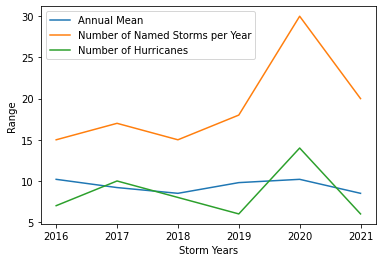

In [ ]:
#creates a plot map through matplotlib

year = merged_data['year']
count = merged_data['Total_Num_Storms']
mean = merged_data['Annual_mean'] *10
h_count = merged_data['Hurricane_Count']


plt.plot(year,mean, label = "Annual Mean")
plt.plot(year,count, label = "Number of Named Storms per Year")
plt.plot(year,h_count, label= "Number of Hurricanes")
plt.xlabel('Storm Years')
plt.ylabel('Range')
plt.legend()

plt.savefig("graph.png")
plt.show()

#plt.savefig("graph1.png")